In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns
import warnings

from tools import *

%matplotlib inline

warnings.filterwarnings('ignore')

## Distribution of P(active) values for each position

In [2]:
total_compounds = pd.read_csv('../../../FINAL/data_preparation/1_data_cleaning_and_formatting/scripts/total_compounds.csv').drop(columns=['Unnamed: 0'])
display(total_compounds.head(5))


,structure,read_count,bb1,bb2,bb3
0,CN(Cc1c(F)ccc(Cl)c1F)C(=O)CCn1ccc(C(=O)NCCC(c2...,172,NCC1=C(F)C(Cl)=CC=C1F,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1
1,CN(CCOc1ccccc1)C(=O)CC1CCC(C(=O)NCCC2CCCCCCC2)CC1,611,NCCOC1=CC=CC=C1,C1CC(CCC1CC(=O)O)C(=O)O,NCCC1CCCCCCC1
2,CCCCCCN(C)C(=O)c1cc(C)c(OCC(=O)NCCC(c2ccc(F)cc...,1401,CCCCCCN,Cc1cc(cc(c1OCC(=O)O)C)C(=O)O,NCCC(C1=CC=C(F)C=C1)C1=CC=CO1
3,CCOc1cccc(CCNC(=O)c2csc3cc(C(=O)N(C)Cc4cc(F)cc...,86,NCC1=C(Cl)C=CC(F)=C1,c1c2c(c(cs2)C(=O)O)sc1C(=O)O,CCOC1=CC=CC(CCN)=C1
4,CNC(=O)[C@H](Cc1cccc(OC)c1)NC(=O)[C@H]1CC[C@H]...,380,COc1cccc(c1)C[C@@H](C(=O)O)N,O=C(O)[C@H]1CC[C@H](C(=O)O)CC1,NCCC(C1=CC=C(F)C=C1)C1=CC=CO1


In [3]:
bb1_pactive = calc_pactive(total_compounds, bb_pos='bb1')
bb2_pactive = calc_pactive(total_compounds, bb_pos='bb2')
bb3_pactive = calc_pactive(total_compounds, bb_pos='bb3')

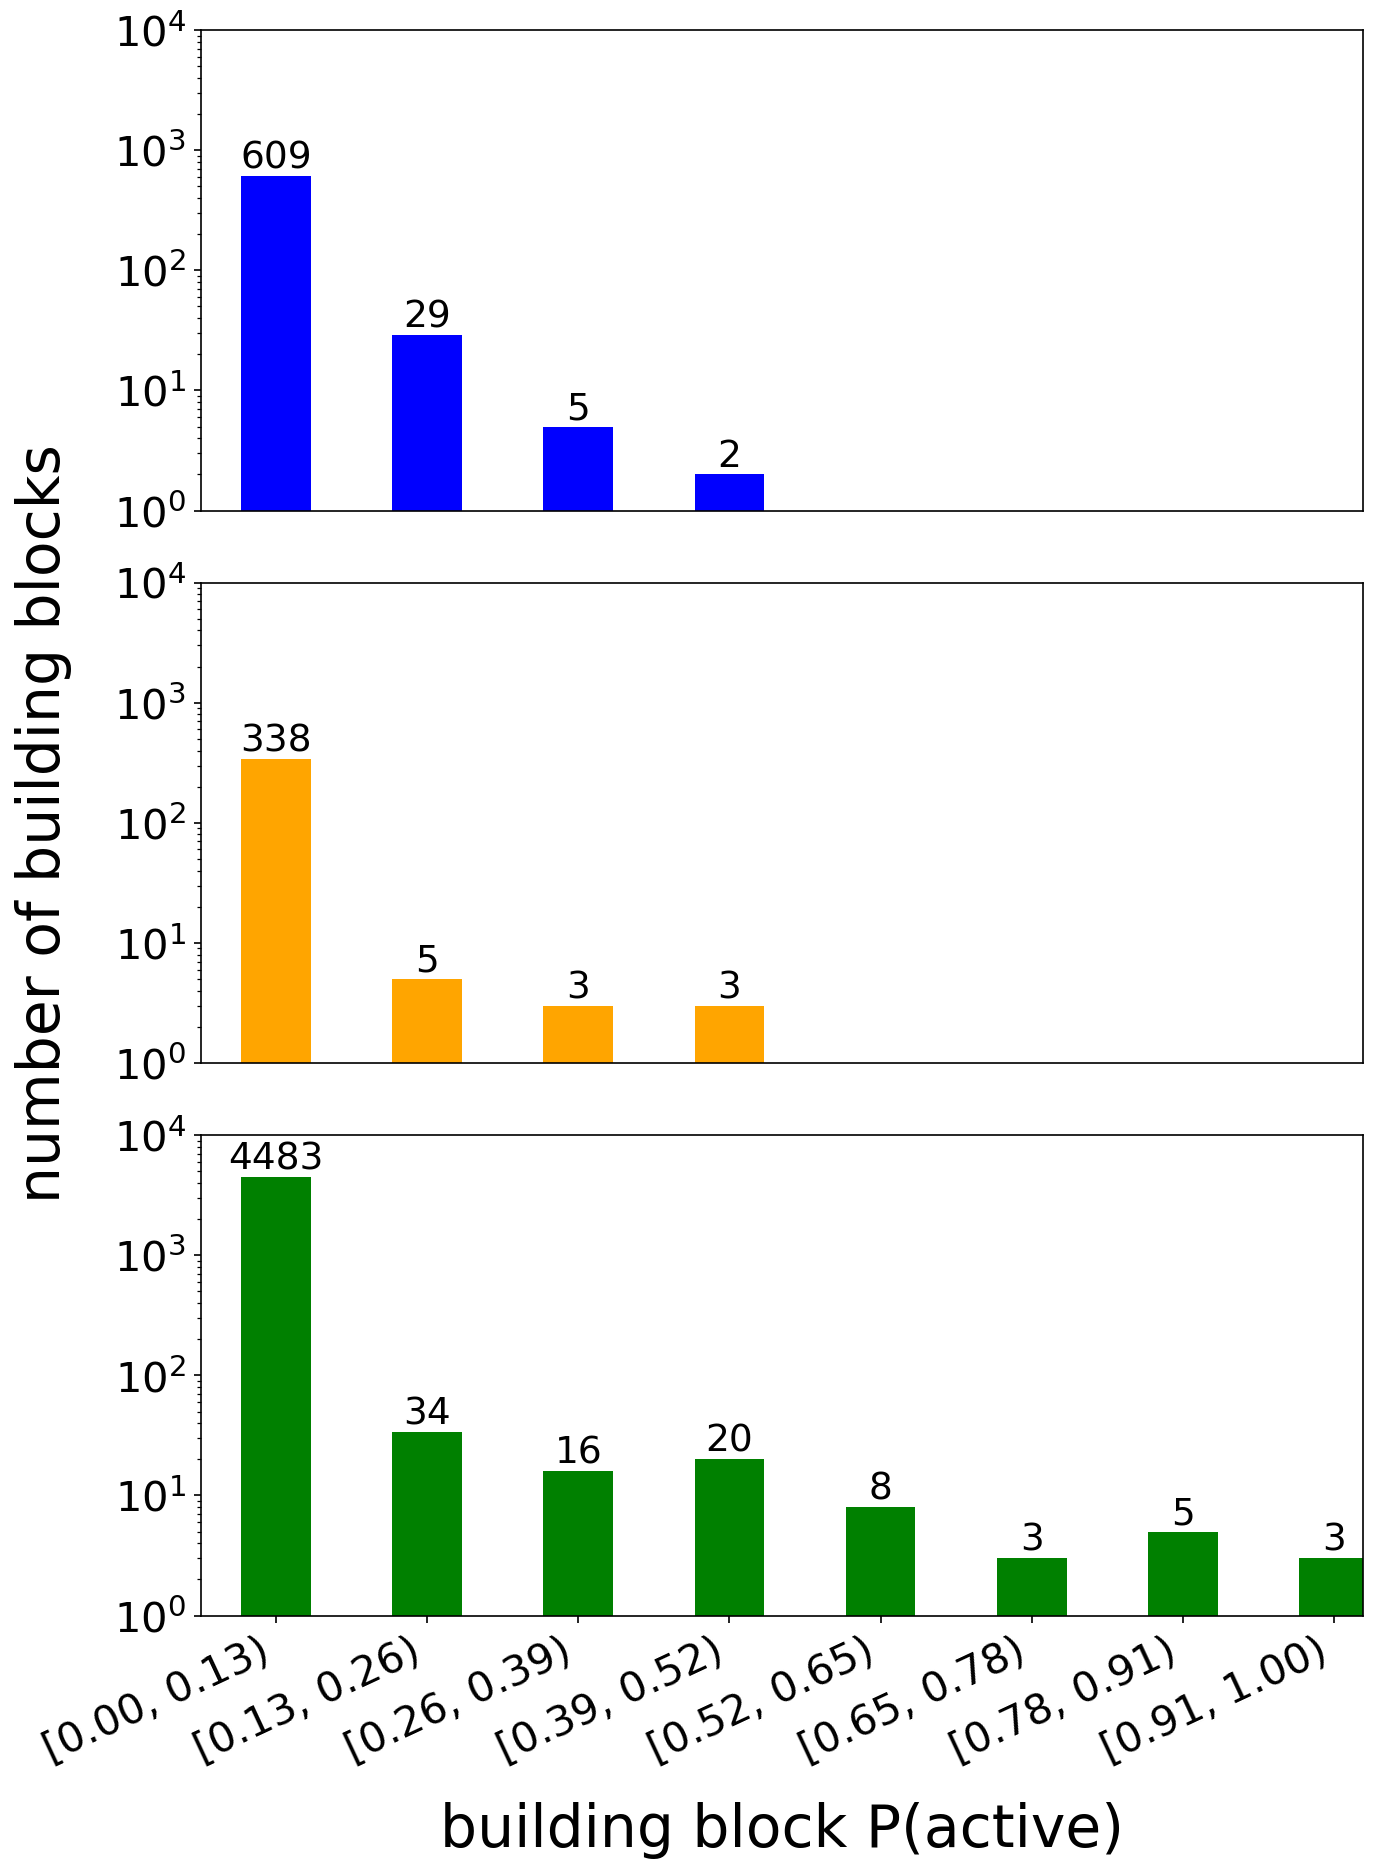

In [4]:
a_bars, b_bars, c_bars = plot_pactive(bb1_pactive, bb2_pactive, bb3_pactive)

### Visualize top P(active) building blocks at each position

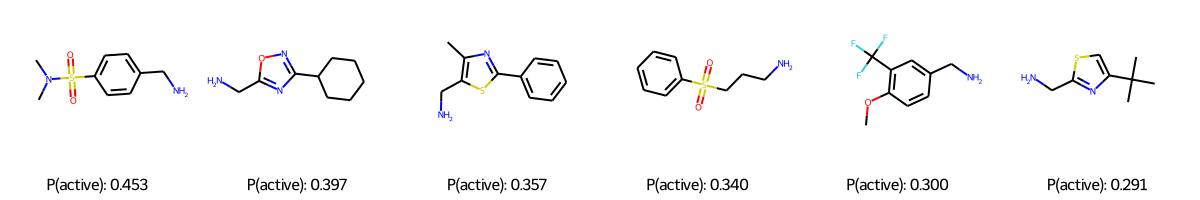

In [5]:
view_top_bbs(bb1_pactive, bb_pos="bb1", N=6)

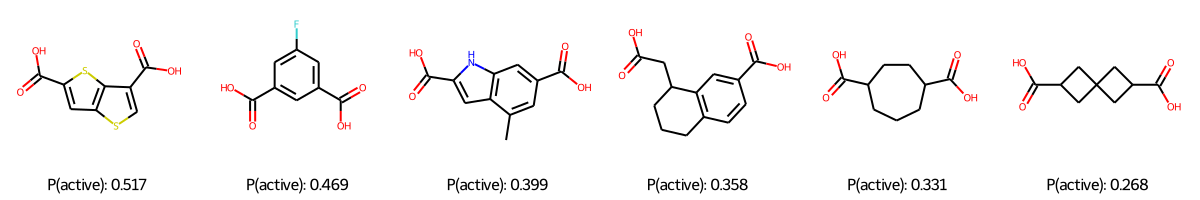

In [6]:
view_top_bbs(bb2_pactive, bb_pos="bb2", N=6)

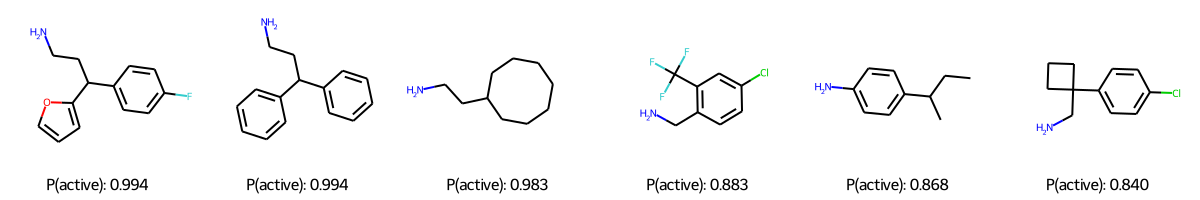

In [7]:
view_top_bbs(bb3_pactive, bb_pos="bb3", N=6)

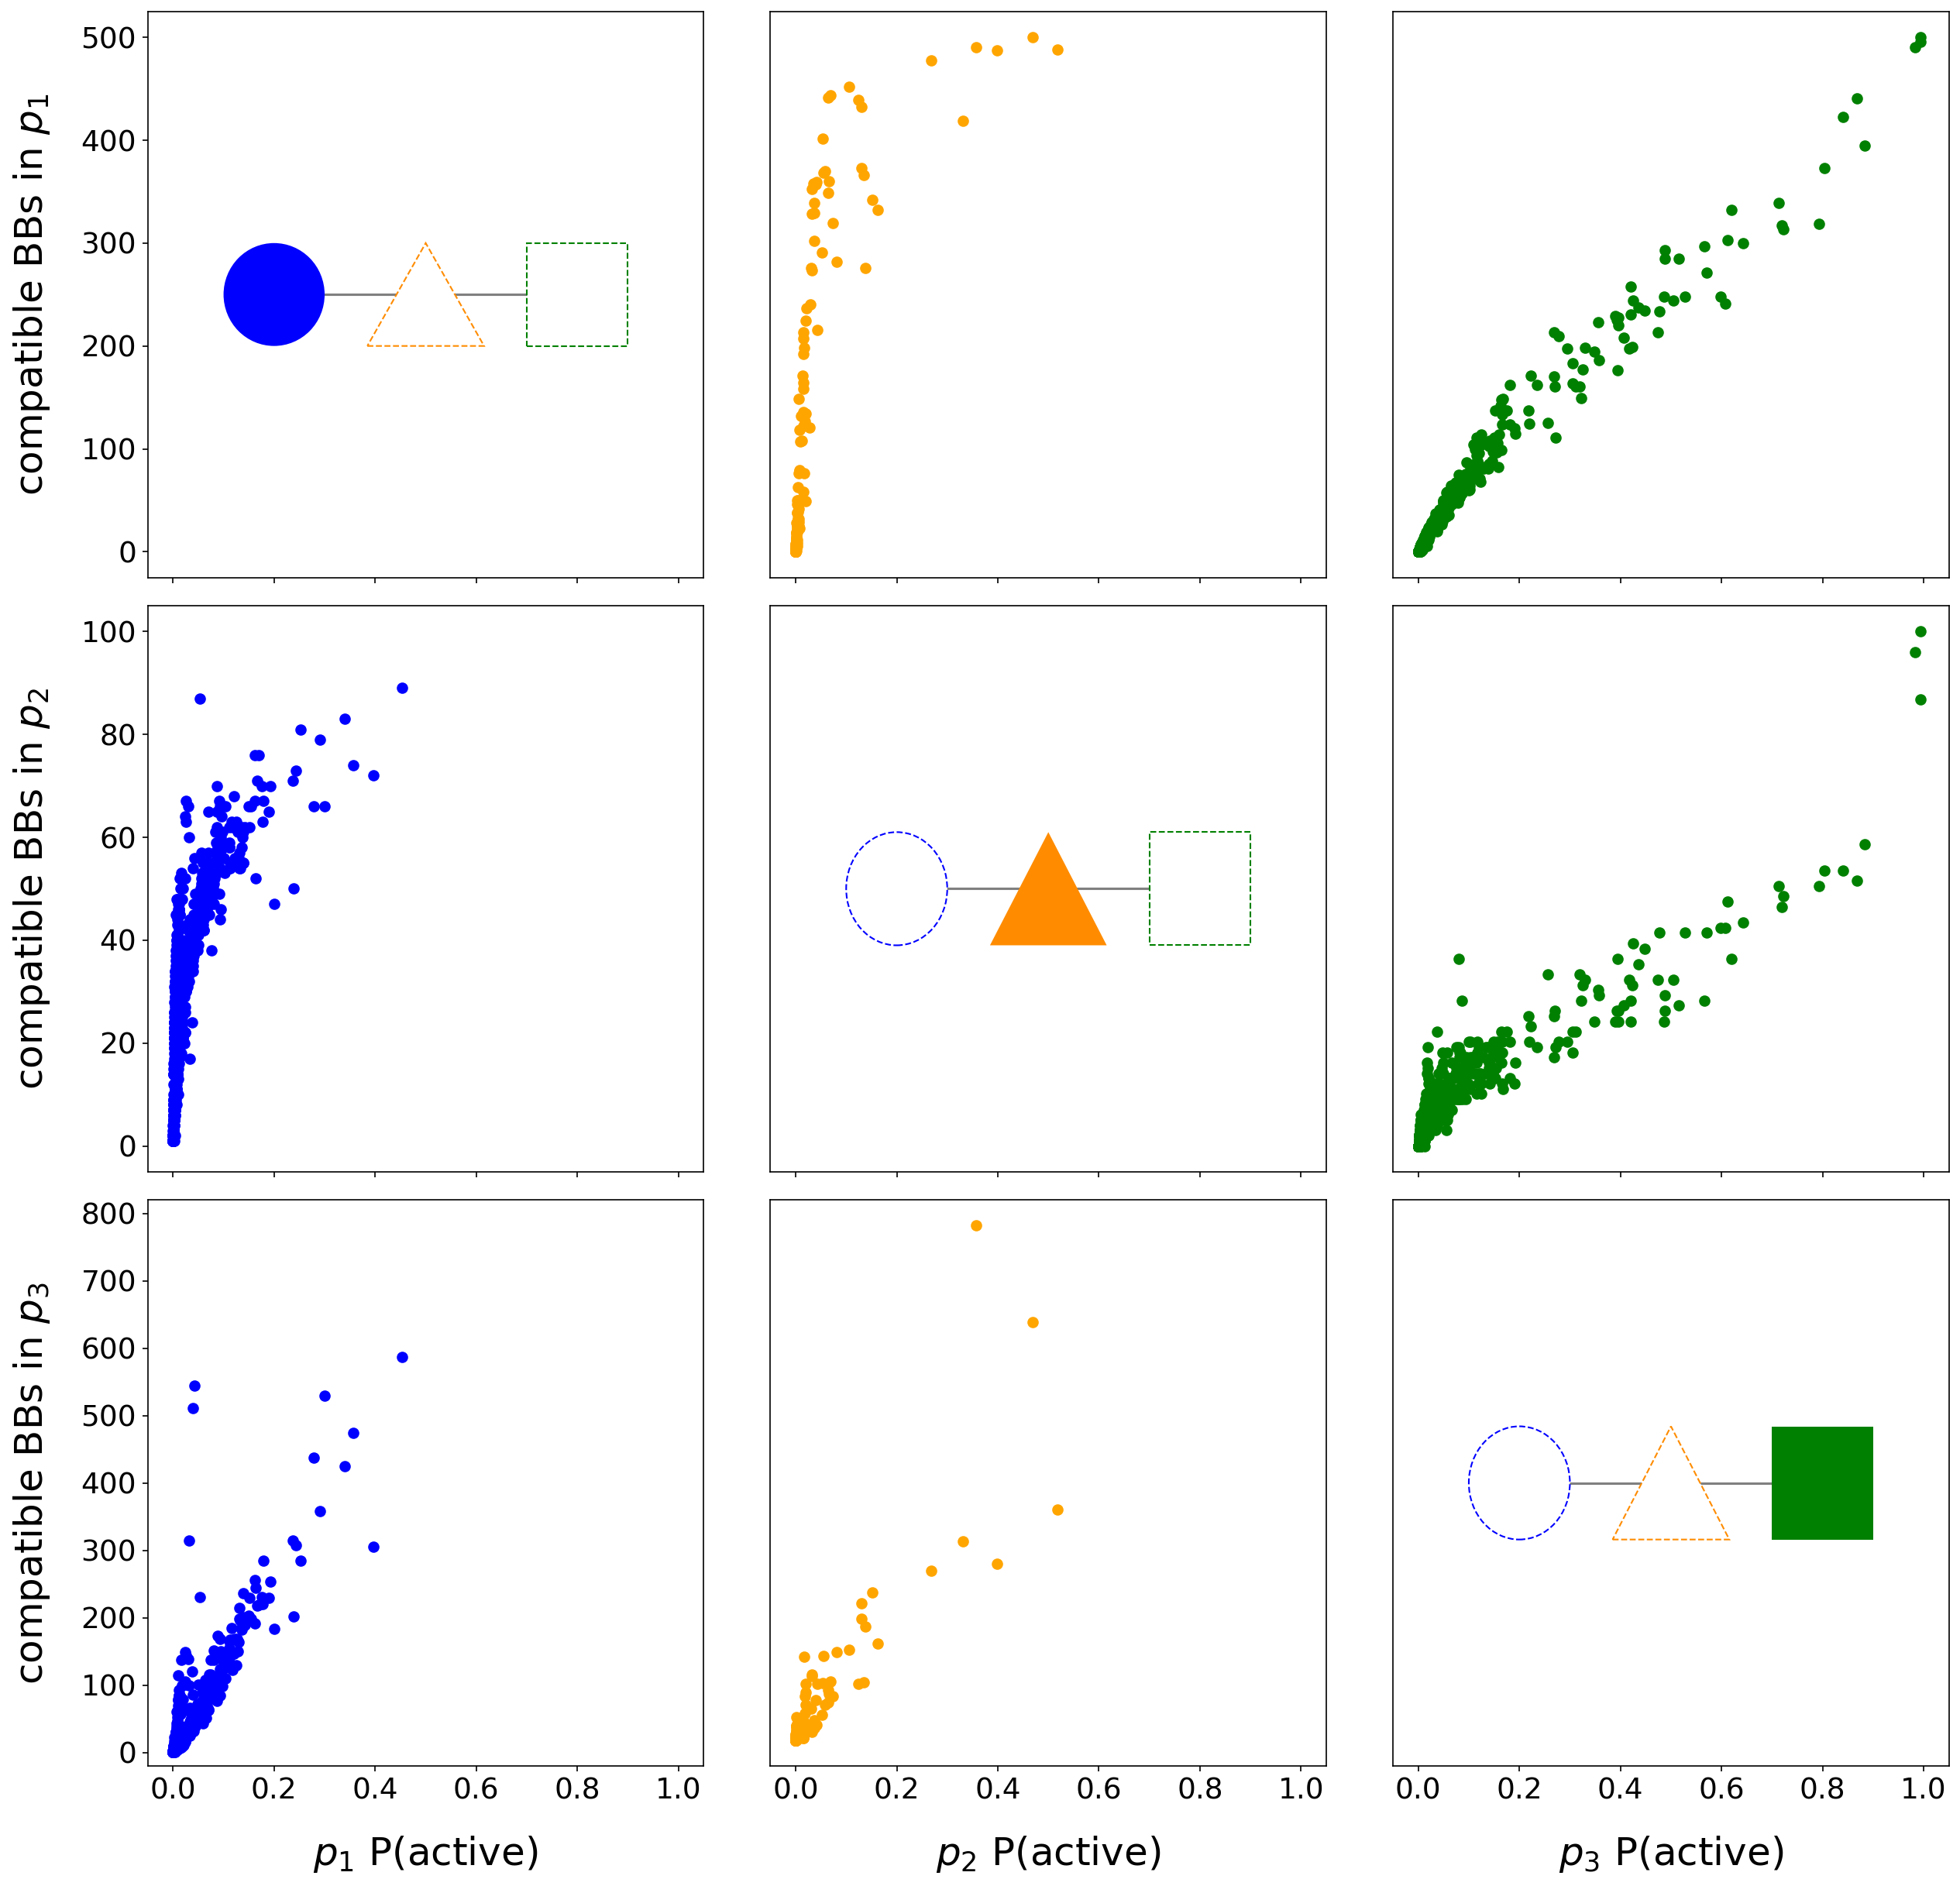

In [8]:
total_merged = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
actives = get_actives(total_merged)
D_12, D_13, D_21, D_23, D_31, D_32 = plot_compatible(actives)

### View 2D bins

In [9]:
bb1_pactive = apply_bins(bb1_pactive, bb_pos='bb1')
bb2_pactive = apply_bins(bb2_pactive, bb_pos='bb2')
bb3_pactive = apply_bins(bb3_pactive, bb_pos='bb3')

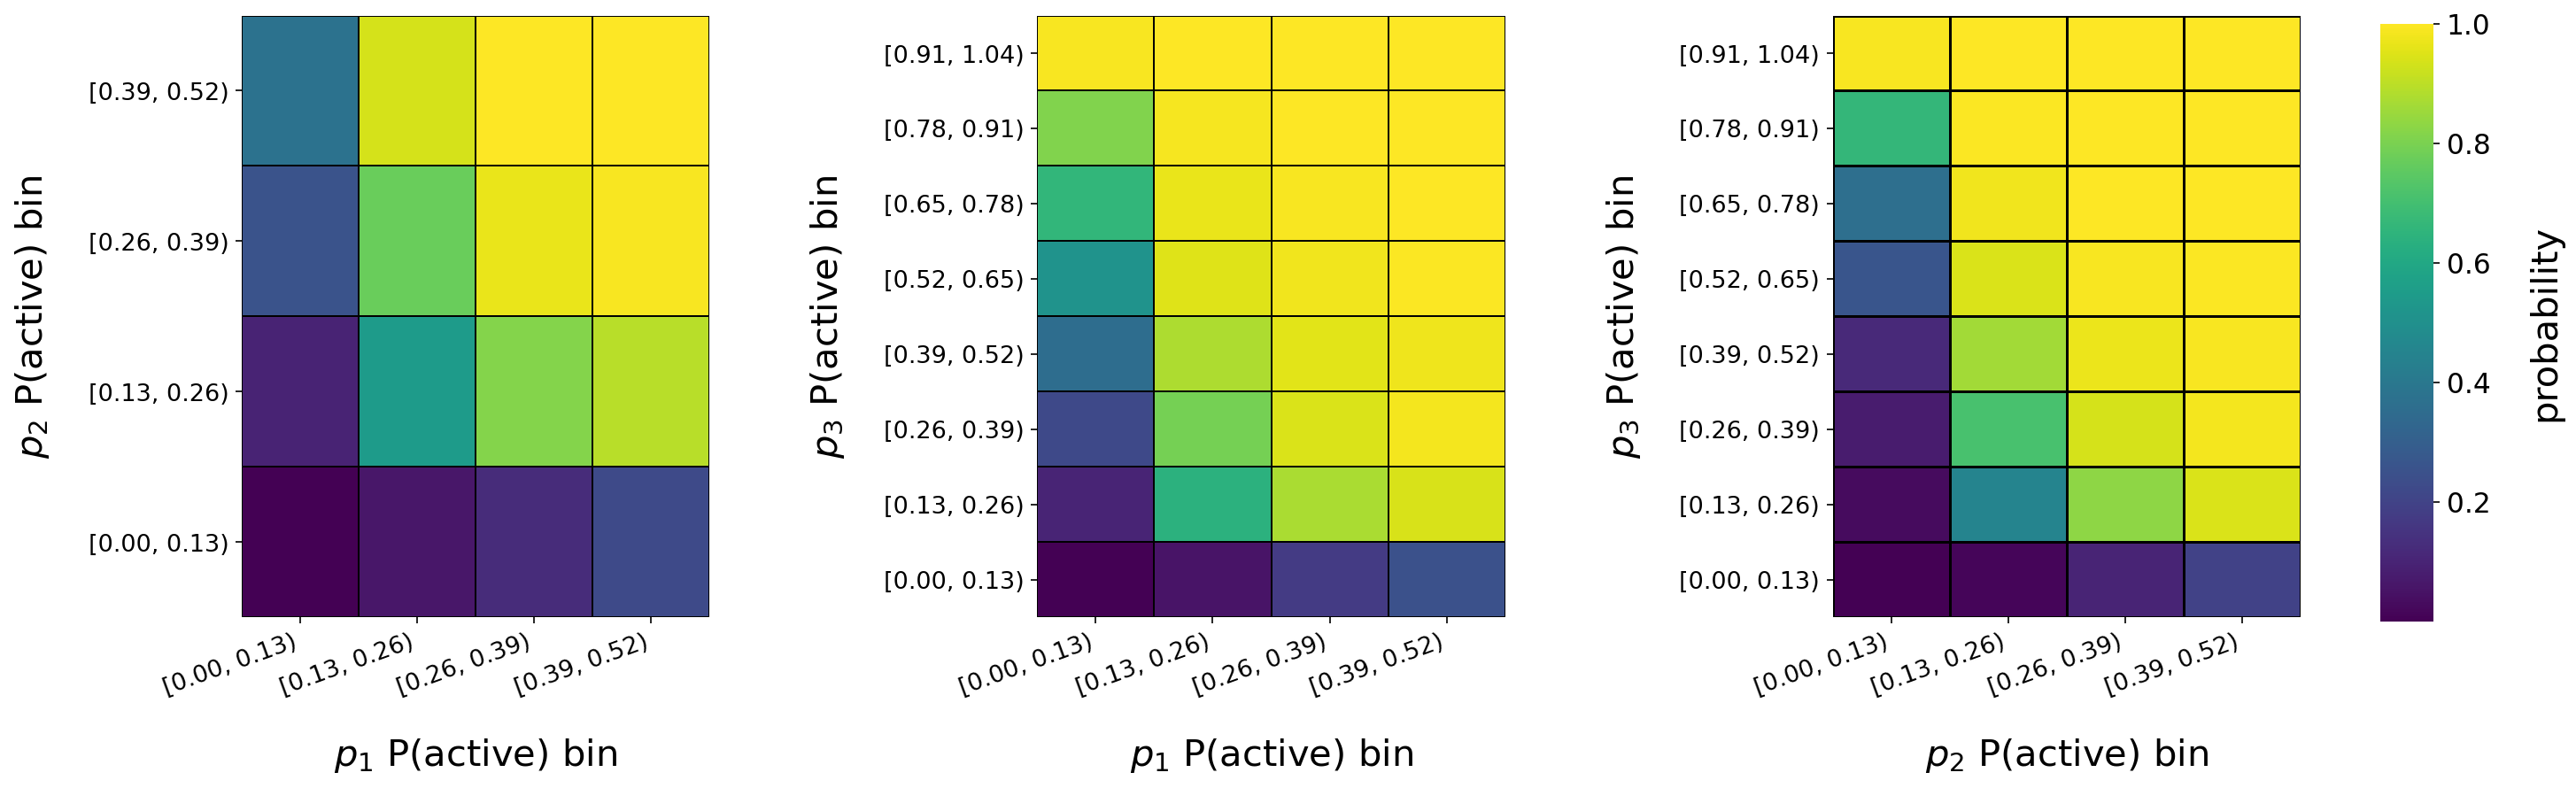

In [10]:
total_bins = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
bins_1_2, bins_1_3, bins_2_3 = plot_2D_bins(total_bins, bb1_pactive, bb2_pactive, bb3_pactive)

### Import similarity matrix

In [11]:
bb1_sim_3D = np.load('../../../FINAL/data_preparation/output/bb1_dist_3D.npy')
bb2_sim_3D = np.load('../../../FINAL/data_preparation/output/bb2_dist_3D.npy')
bb3_sim_3D = np.load('../../../FINAL/data_preparation/output/bb3_dist_3D.npy')

bb1_dist_3D = dist_mat(bb1_sim_3D)
bb2_dist_3D = dist_mat(bb2_sim_3D)
bb3_dist_3D = dist_mat(bb3_sim_3D)

#### Map coordinates with UMAP

In [12]:
trans_bb1 = umap_transform(bb1_dist_3D)
trans_bb2 = umap_transform(bb2_dist_3D)
trans_bb3 = umap_transform(bb3_dist_3D)

,Position,top - top dist,top - rand dist
0,1,4.116311,8.253764
1,2,1.112908,7.820370
2,3,4.775215,10.763057


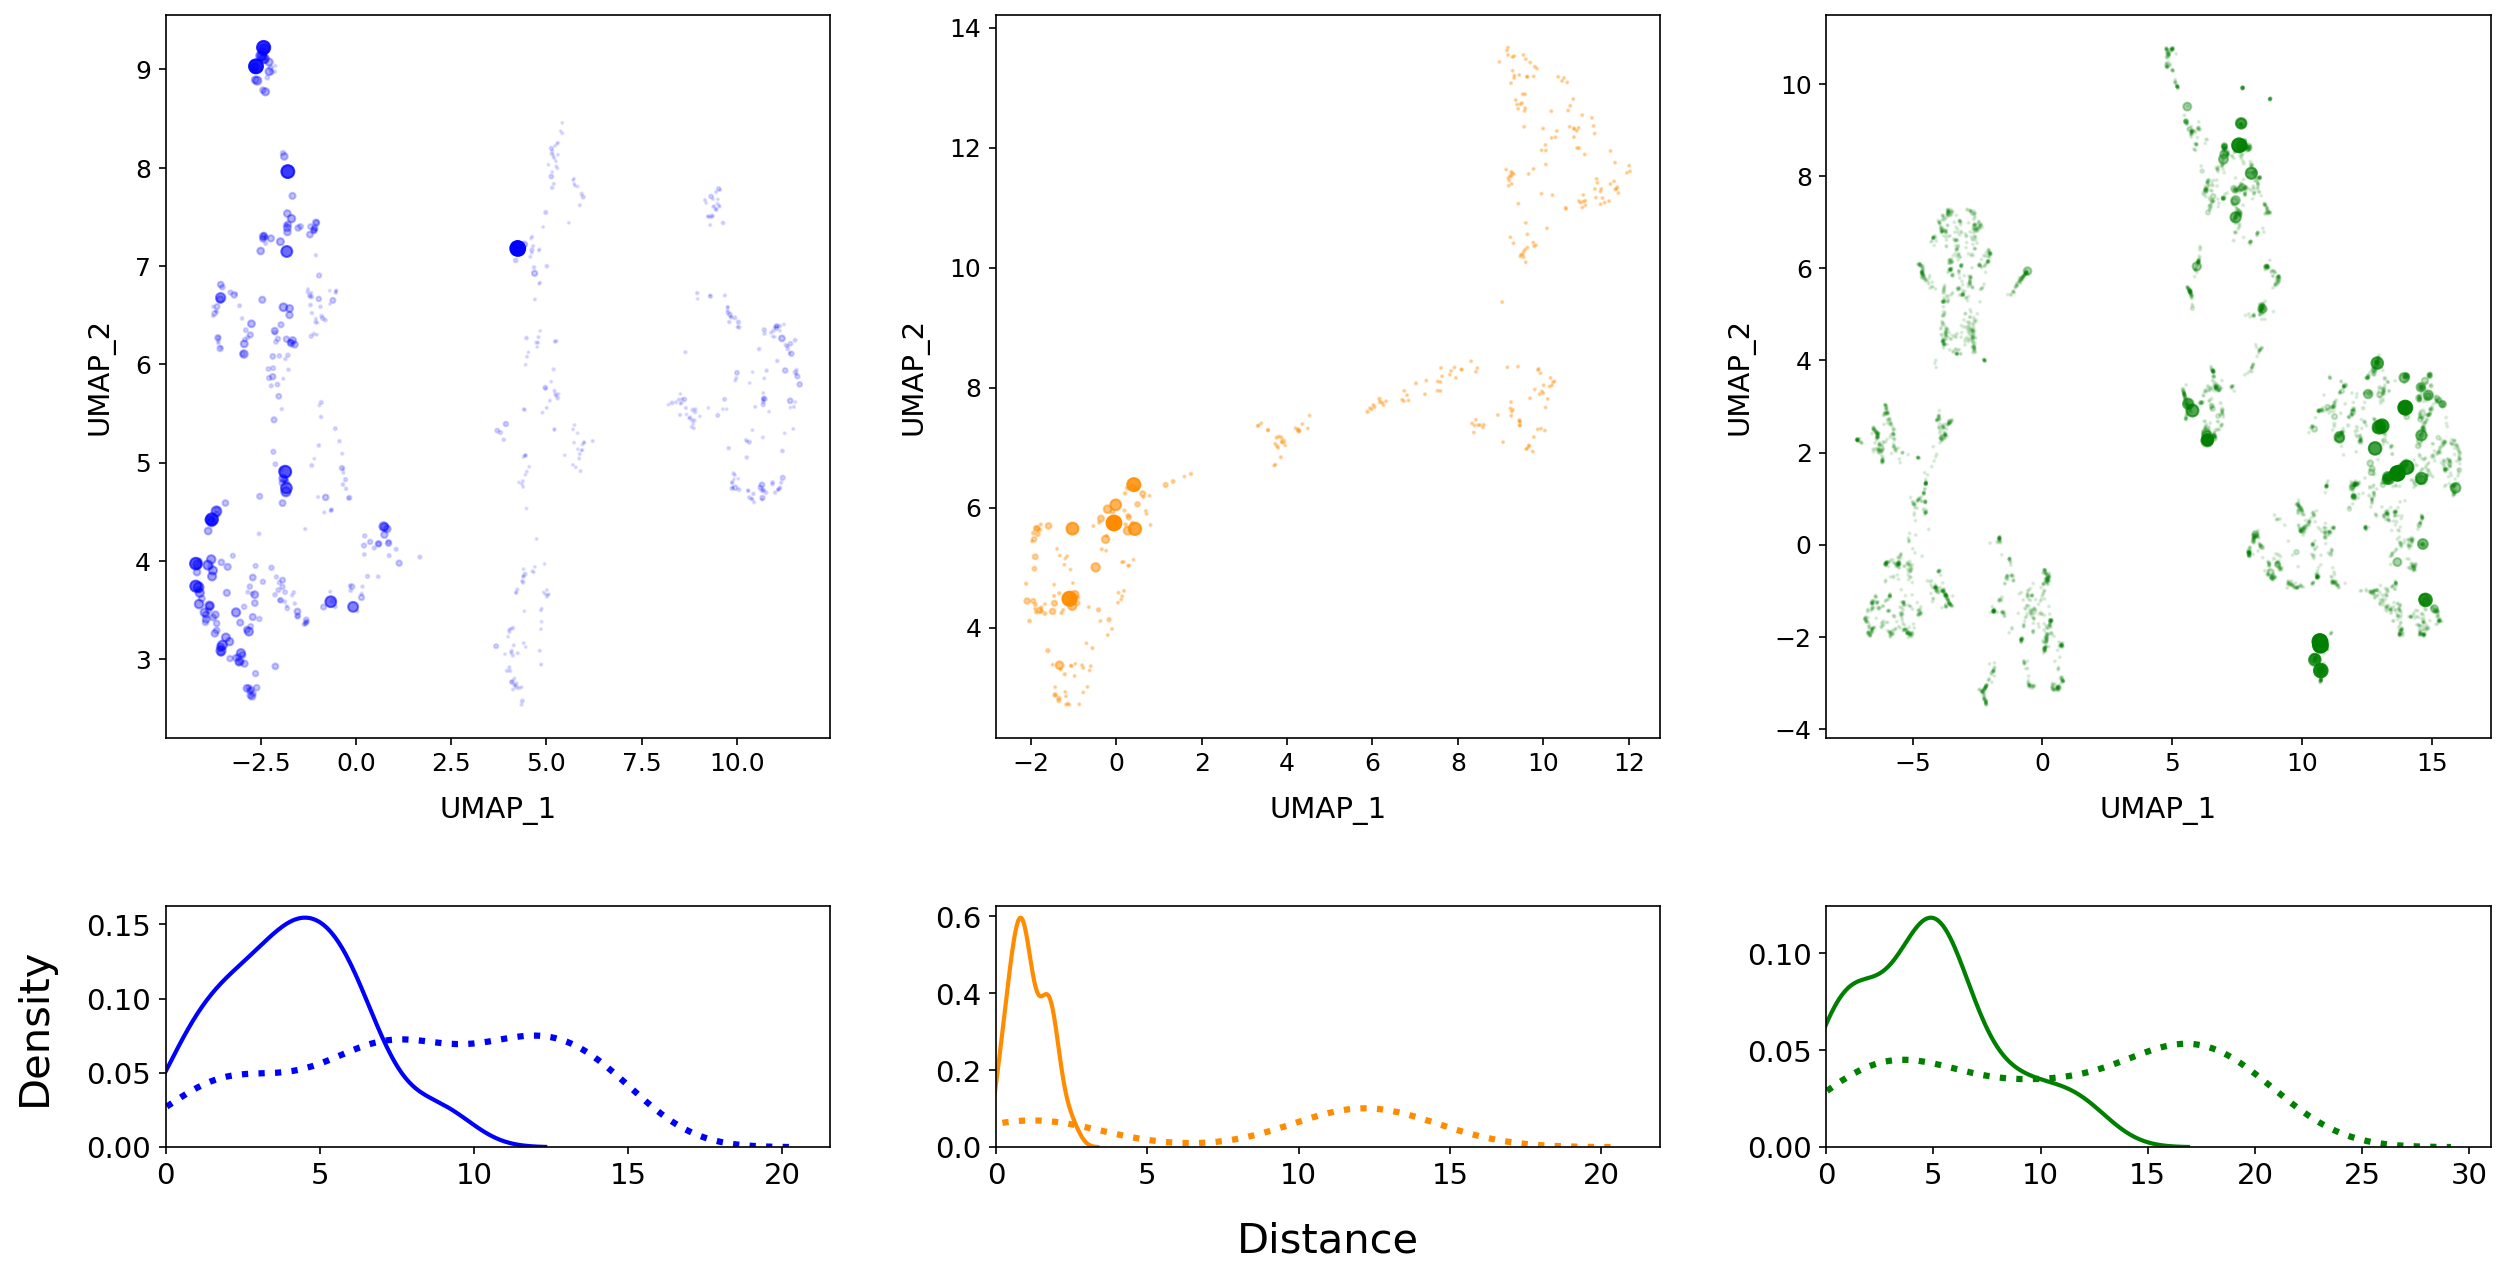

In [13]:
bb1_pactive, bb2_pactive, bb3_pactive = plot_umap(bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1, trans_bb2, trans_bb3)


### Cluster with HDBSCAN

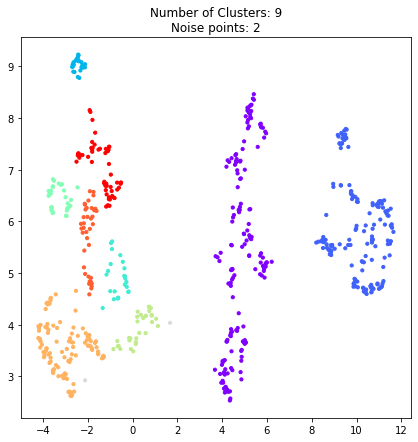

In [14]:
bb1_params = hdbscan_param_search(bb1_pactive, trans_bb1)
bb1_best_params = optimal_params(bb1_params)
bb1_pactive = plot_hdbscan(bb1_pactive, bb1_best_params, trans_bb1)

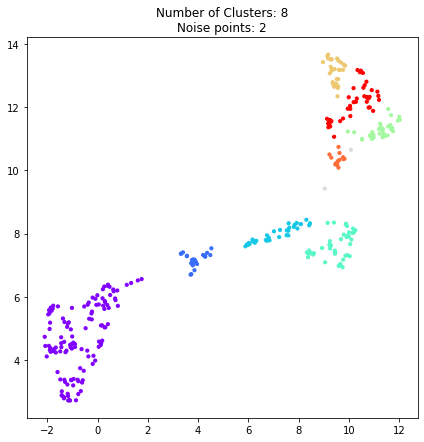

In [15]:
bb2_params = hdbscan_param_search(bb2_pactive, trans_bb2)
bb2_best_params = optimal_params(bb2_params)
bb2_pactive = plot_hdbscan(bb2_pactive, bb2_best_params, trans_bb2)

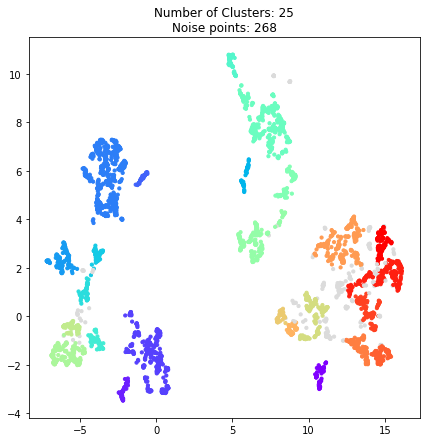

In [26]:
bb3_params = hdbscan_param_search(bb3_pactive, trans_bb3)
bb3_best_params = optimal_params(bb3_params)
bb3_pactive = plot_hdbscan(bb3_pactive, bb3_best_params, trans_bb3)

#### View interactive plots with compound structures (mouse-over point)

In [31]:
#plot_hdbscan_interactive(bb1_pactive, bb1_best_params, trans_bb1, bb_pos='bb1')
#plot_hdbscan_interactive(bb2_pactive, bb2_best_params, trans_bb2, bb_pos='bb2')
#plot_hdbscan_interactive(bb3_pactive, bb3_best_params, trans_bb3, bb_pos='bb3')

### Aggregate by cluster

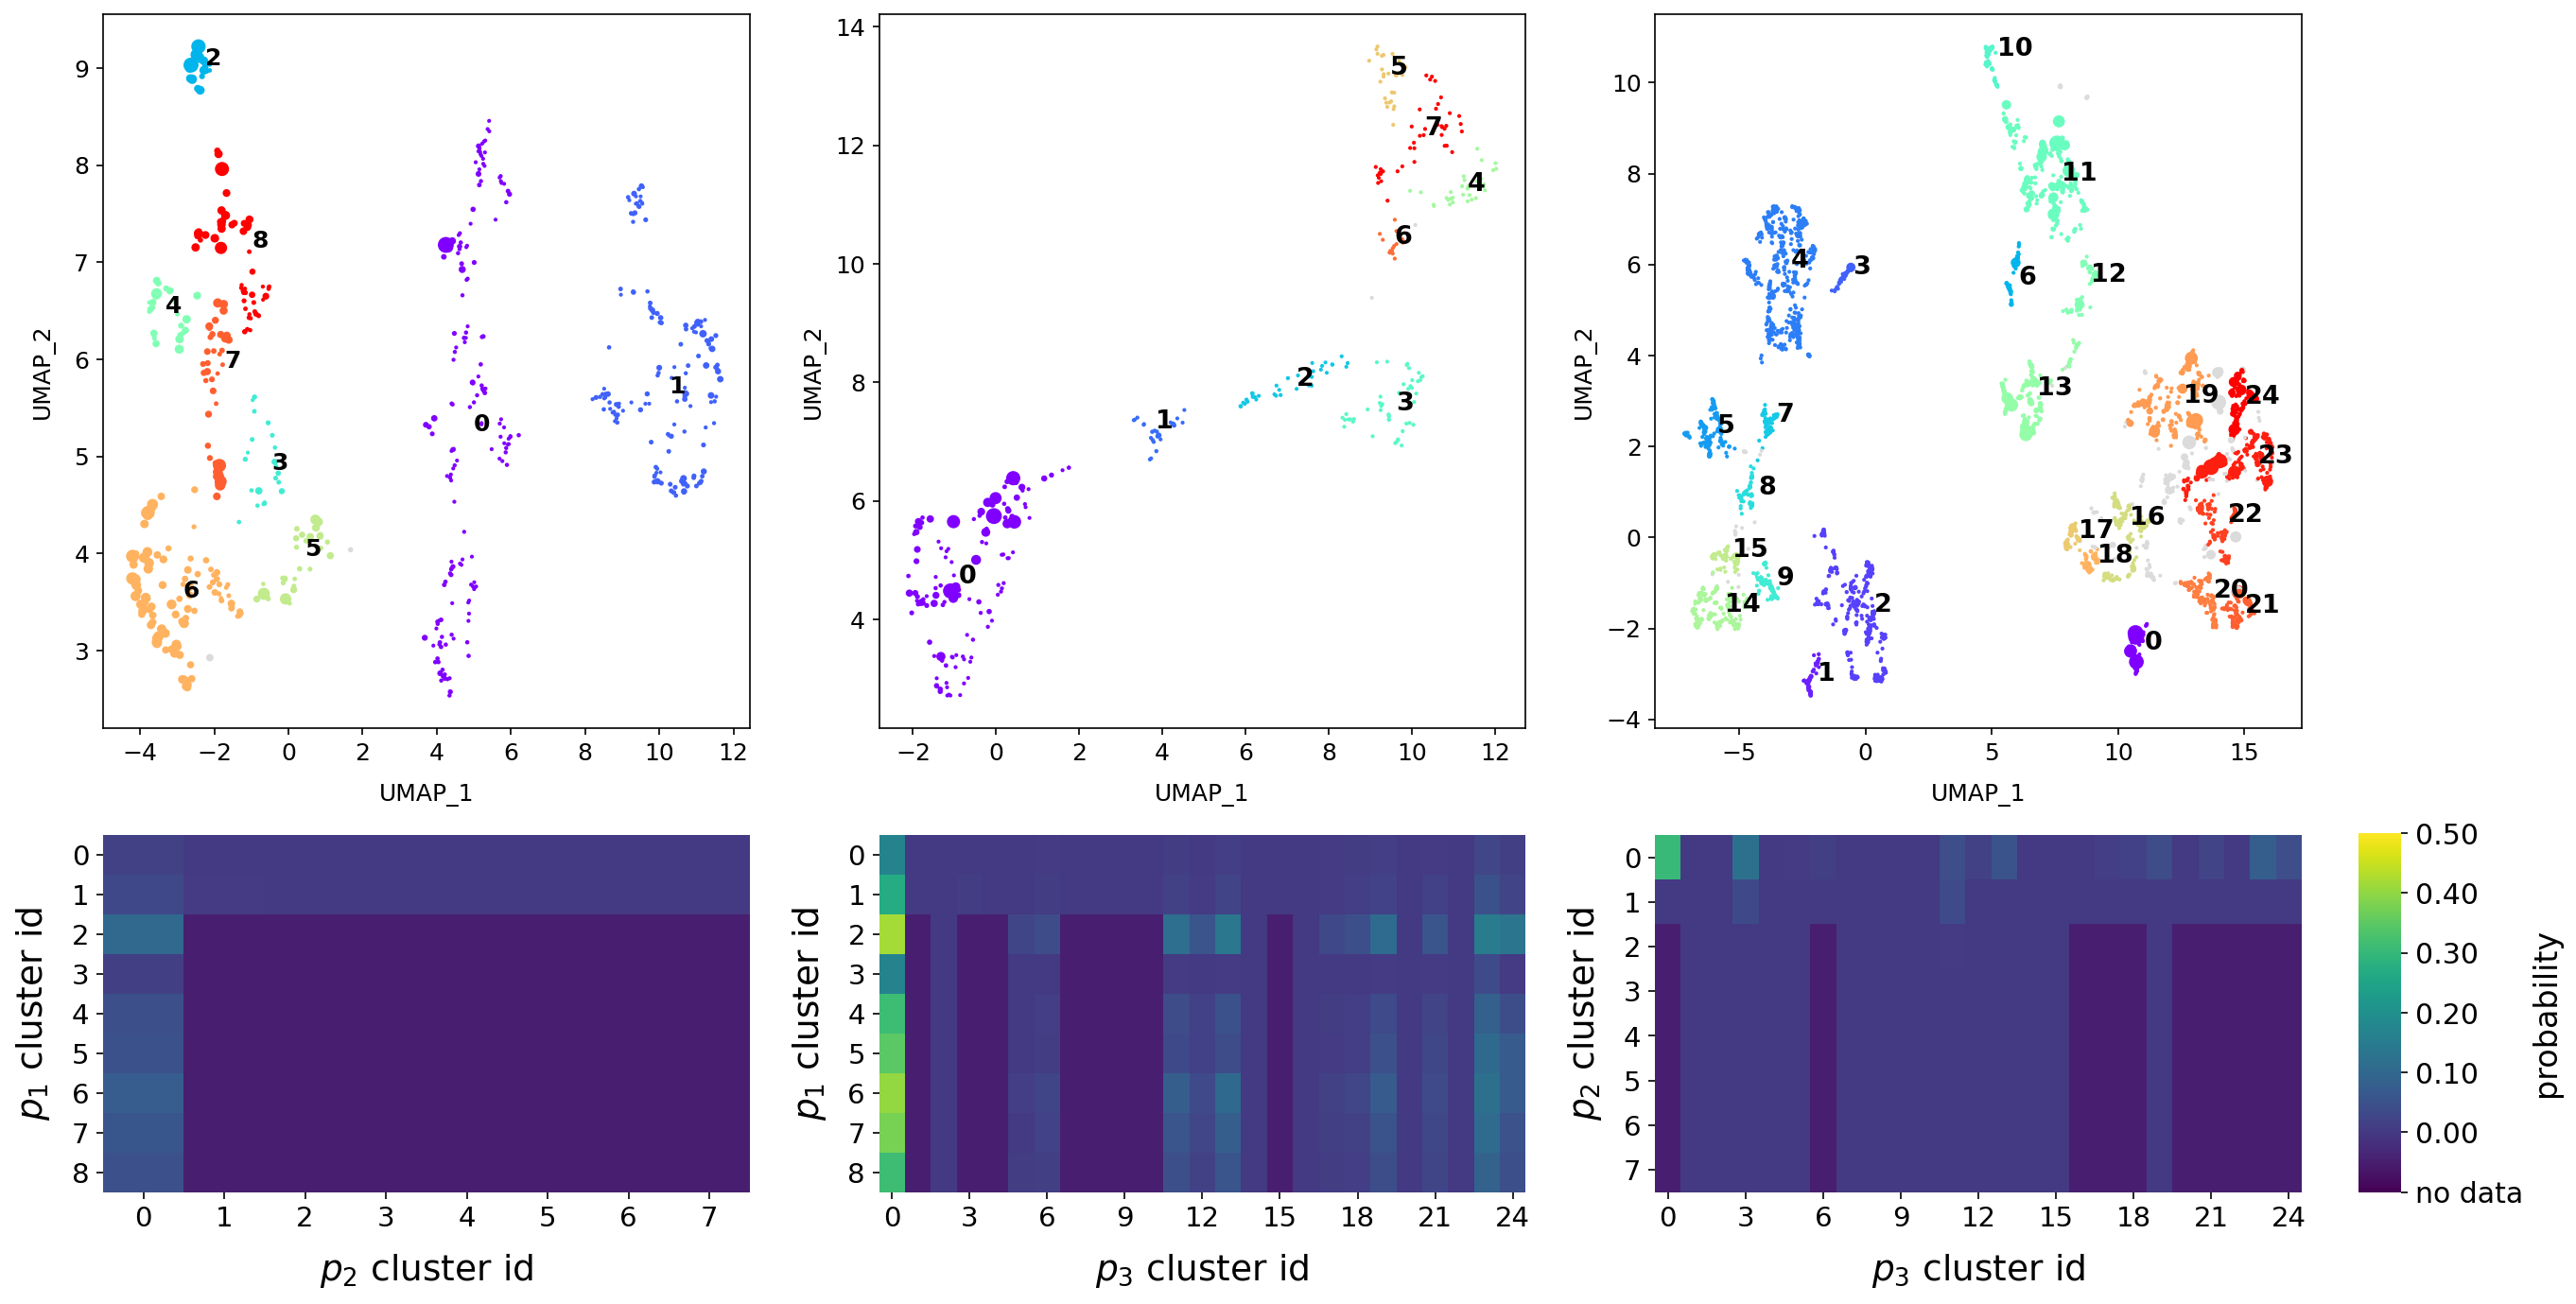

In [17]:
p_12, p_13, p_23 = plot_cluster_combos(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1, trans_bb2, trans_bb3)

### Distribution of P(active) values and building blocks in each cluster

In [19]:
bb1_cluster, bb1_data = cluster_rep(bb1_pactive, bb_pos='bb1')
bb2_cluster, bb2_data = cluster_rep(bb2_pactive, bb_pos='bb2')
bb3_cluster, bb3_data = cluster_rep(bb3_pactive, bb_pos='bb3')

In [20]:
mols2grid.display(bb1_cluster, subset=['Cluster', 'img', 'Num'])

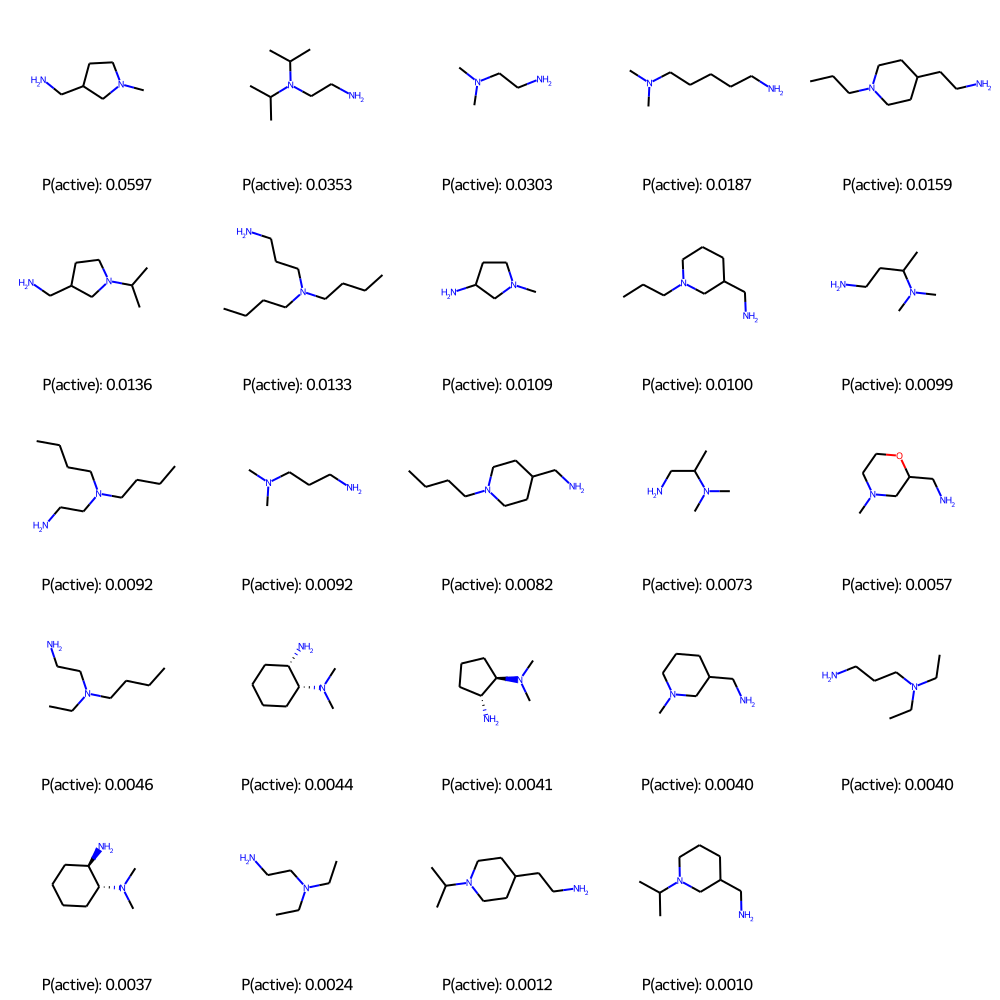

In [61]:
selection = mols2grid.get_selection()
display_cluster_members(bb1_data, selection)

In [22]:
bb1_random = gen_random_cluster(bb1_pactive, bb_pos='bb1')
bb2_random = gen_random_cluster(bb2_pactive, bb_pos='bb2')
bb3_random = gen_random_cluster(bb3_pactive, bb_pos='bb3')

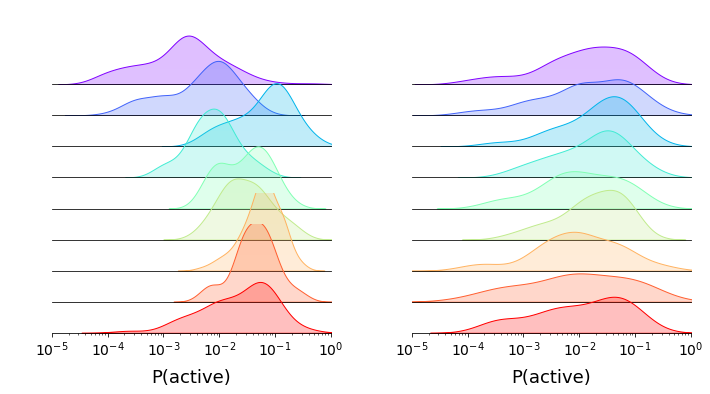

In [55]:
plot_cluster_pactive(bb1_pactive, bb1_random)

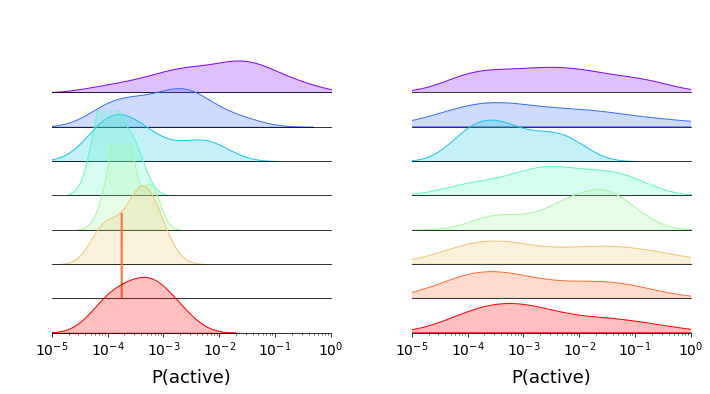

In [56]:
plot_cluster_pactive(bb2_pactive, bb2_random)

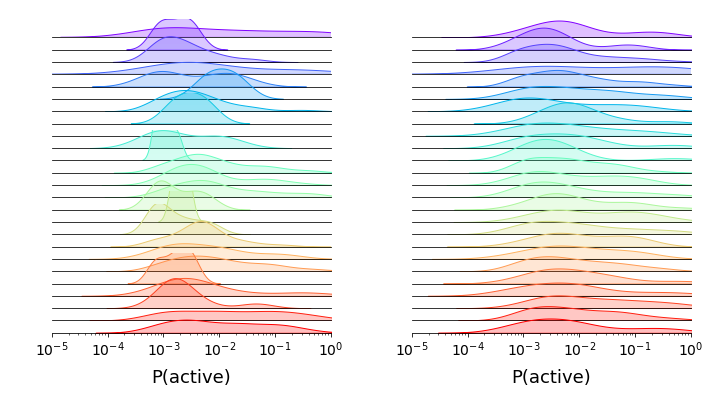

In [57]:
plot_cluster_pactive(bb3_pactive, bb3_random)